Digite a quantidade de seriais: 2
Digite a quantidade de atendentes no nível 1: 2
Digite a quantidade de atendentes no nível 2: 2
Digite velocidade no nível 1: 2
Digite velocidade no nível 2: 2
8.131976682164305
Número de Clientes Atendidos: 
28
Tempo de Chegada dos Clientes: 
[0.11718548730067095, 0.13672178253664521, 0.3462980437822748, 0.34704362262041055, 0.6531322594917834, 0.6638863894950209, 0.6696208710332809, 0.707399331101085, 0.8594359256211401, 0.9201954931047345, 1.1691606093230025, 1.4262377417761973, 1.60487643778893, 1.7070918380572713, 1.847416802909836, 1.9342641642929133, 2.274207866005827, 2.3328369586966056, 2.36001096566017, 2.3874189172232128, 2.4075907939918904, 2.4744715302183518, 2.598055739216336, 2.6152730897674767, 2.7027406936478746, 2.85608132420634, 2.941578903359041, 3.9523168306869483]
Lista de Saída dos Clientes do Caixa 1 na etapa 1 | Pessoas Atendidas: 14
[0.14463973487000137, 0.37941509133483026, 0.4868290237289322, 0.7178594453802433, 1.2933441266

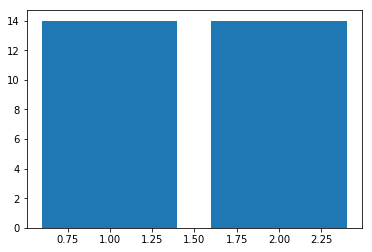

Lista de Saída dos Clientes do Caixa 1 na etapa 2 | Pessoas Atendidas: 15
[1.1583249680278427, 1.2678288973783056, 1.4738039775097127, 1.4886989811831295, 1.7305893701847535, 1.8827065384737125, 2.140282199662508, 2.154424164009982, 2.523900948466111, 2.57680306406657, 3.735536799388555, 4.568154730616505, 5.657724837376098, 5.6928933823437315, 8.131976682164305]
Lista de Saída dos Clientes do Caixa 2 na etapa 2 | Pessoas Atendidas: 13
[0.4601623609575345, 1.1111867318853026, 1.2386325226033945, 1.658890515682233, 2.3871381945373153, 2.503057235031837, 2.7910350299912645, 3.125672897383013, 3.2075007180889172, 3.8038590638419802, 4.524990616540448, 4.5538314261669735, 5.606101742496172]


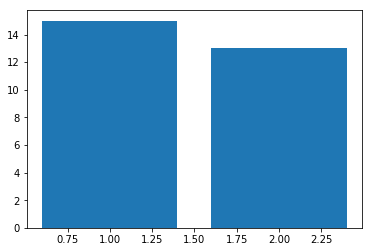

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt



def rExponencial(nsamples, rate):
    x = np.zeros(nsamples)
    u = np.random.sample(nsamples)
    for i in range(nsamples):
        x[i] = - math.log(u[i])/rate
    return x


def rate(t):
    if (t < 1.0):
        return 10.0
    elif (t < 2.0):
        return 5.0
    elif (t < 3.0):
        return 10.0
    elif (t < 4.0):
        return 2.0
    elif (t < 5.0):
        return 5.0
    else:
        return 10.0


def rNextArrival(t, rate, ratemax):
    while (1):
        Z = rExponencial(1, ratemax)[0]
        t = t + Z
        U = np.random.sample(1)
        if (U < rate(t)/ratemax):
            return t

def proxCaixa(bancocaixas):
    lowestTime = 1.0e+30
    etapa = 0
    caixa = 0

    for i in range(0, len(bancocaixas)):
        for j in range(0, len(bancocaixas[i])):
            if (bancocaixas[i][j] < lowestTime):
                lowestTime = float(bancocaixas[i][j])
                etapa = i
                caixa = j

    return [lowestTime, etapa, caixa]
        
        
def contaClientes(clientes):
    soma = 0
    for cliente in clientes:
        soma += cliente
    return soma
        
def encontraCaixaLivreNaEtapa(etapa, bancocaixas):
    for i in range(0, len(bancocaixas[etapa])):
        if bancocaixas[etapa][i] == 1.0e+30:
            return i
    return -1

def rParallelQueue(rate, ratemax, rateD, T, caixas):
    
    if (len(caixas) != len(rateD)):
        print("Parâmetros Errados")
        return -1, -1, -1
    qtd_caixas = len(caixas)

    tempoCurr = 0.0
    timeArrival = rNextArrival(tempoCurr, rate, ratemax)
    #closingTime = T

    clientePorEtapa = np.zeros(qtd_caixas)

    timeArrivals = []
    timeDepartures = []

    bancocaixas = []
    
    if (len(rateD) != qtd_caixas):
        print("Você precisa passar uma rate por etapa do processo")
        return -1, -1, -1
    
    stepRates = []
    for rates in rateD:
        stepRates.append(rates)

    for etapa in range(qtd_caixas):
        bancocaixas.append([])
        timeDepartures.append([])
        for caixa in range(caixas[etapa]):
            bancocaixas[etapa].append([])
            bancocaixas[etapa][caixa] = 1.0e+30
            timeDepartures[etapa].append([])
    

    def insereCliente(etapa):
        clientePorEtapa[etapa] += 1
        caixa = encontraCaixaLivreNaEtapa(etapa,bancocaixas)
        if (caixa != -1):
            bancocaixas[etapa][caixa] = tempoCurr + \
                rExponencial(1, stepRates[etapa])[0]

    def executaProxCaixa():
        nonlocal tempoCurr
        # Pega informações do caixa que terminou
        time, etapaAtual, caixa = proxCaixa(bancocaixas)
        # Avança o relógio
        tempoCurr = time
        # Cliente sai daquela etapa

        clientePorEtapa[etapaAtual] -= 1
        # Registramos o tempo de saída do Cliente
        timeDepartures[etapaAtual][caixa].append(tempoCurr)
        # Se o cliente não estava na última etapa, ele irá para a próxima
        if (etapaAtual != (qtd_caixas - 1)):
            insereCliente(etapaAtual + 1)
        # Se o número de pessoas na etapa > que o número de caixas, então existe uma fila a ser atendida
        if (clientePorEtapa[etapaAtual] >= len(bancocaixas[etapaAtual])):
            bancocaixas[etapaAtual][caixa] = tempoCurr + \
                rExponencial(1, stepRates[etapaAtual])[0]
        # Se não vai atender ninguém, seta o tempo como infinito para ser considerado livre
        else:
            bancocaixas[etapaAtual][caixa] = 1.0e+30
                
    tempoCurr = 0.0
    timeArrival = rNextArrival(tempoCurr, rate, ratemax)
    #closingTime = T

    clientePorEtapa = np.zeros(qtd_caixas)

    timeArrivals = []
    timeDepartures = []

    bancocaixas = []
    
    if (len(rateD) != qtd_caixas):
        print("Você precisa passar uma rate por etapa do processo")
        return -1, -1, -1
    
    stepRates = []
    for rates in rateD:
        stepRates.append(rates)

    for etapa in range(qtd_caixas):
        bancocaixas.append([])
        timeDepartures.append([])
        for caixa in range(caixas[etapa]):
            bancocaixas[etapa].append([])
            bancocaixas[etapa][caixa] = 1.0e+30
            timeDepartures[etapa].append([])

    while (True):            
        # Próximo Evento: Alguém novo chegou antes de qualquer outra coisa || a chegada é o próximo evento
        if ((timeArrival < proxCaixa(bancocaixas)[0]) and timeArrival < T):
            tempoCurr = timeArrival
            # Salva o tempo de chegada do novo cliente
            timeArrivals.append(tempoCurr)
            clientePorEtapa[0] += 1

            # Tem menos pessoas na etapa do que caixas, então ele deve ser atendido || Existe caixa vazio
            if (clientePorEtapa[0] <= len(bancocaixas[0])):
                caixaIndex = encontraCaixaLivreNaEtapa(0,bancocaixas)
                bancocaixas[0][caixaIndex] = tempoCurr + \
                    rExponencial(1, stepRates[0])[0]
                
            timeArrival = rNextArrival(tempoCurr, rate, ratemax)

        # Próximo Evento: Alguém no Banco foi atendido antes de alguém novo chegar
        elif ((proxCaixa(bancocaixas)[0]) < timeArrival and timeArrival < T):
            executaProxCaixa()

        # O Banco fechou mas há pessoas nas filas para serem atendidas
        # Esse caso é bem semelhante ao if de cima aparentemente.
        elif ((contaClientes(clientePorEtapa) > 0) and (tempoCurr > T or timeArrival > T)):
            while (contaClientes(clientePorEtapa) > 0):
                executaProxCaixa()

        # Acabou!
        else:
            return (tempoCurr, timeArrivals, timeDepartures)


        
qtd_serial = int(input("Digite a quantidade de seriais: "))
caixasPorEtapa = []

for i in range(qtd_serial):
    qtd_atendentes = int(input("Digite a quantidade de atendentes no nível " + str(i+1) + ": ")) 
    caixasPorEtapa.append(qtd_atendentes)

ratesParam = []
for i in range(qtd_serial):
    r = float(input("Digite velocidade no nível " + str(i+1) + ": ")) 
    ratesParam.append(r)
    
#ratesParam = [2.0, 5.0, 2.0]
tempoAtua, TA, TD = rParallelQueue(rate, 10.0, ratesParam, 4.0, caixasPorEtapa)

print(tempoAtua)
print("Número de Clientes Atendidos: ")
print(len(TA))
print("Tempo de Chegada dos Clientes: ")
print(TA)

for i in range(len(TD)):
  for j in range (len(TD[i])):
    print("Lista de Saída dos Clientes do Caixa " + str(j+1) + " na etapa " + str(i+1) + " | Pessoas Atendidas: " 
          + str(len(TD[i][j])))
    if(len(TD[i][j]) != 0): print(TD[i][j])
  plt.bar([x+1 for x in range(len(TD[i]))], [len(x) for x in TD[i]])
  plt.show()

